# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
competitors = ["ADWIN", "HDDM", "NEWMA", "ChangeFinder", "DDM", "Window", "FLOSS", "ClaSS"]
dataset = "WESAD"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}",
                                     usecols=["dataset", eval_score], compression="gzip")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,ADWIN,HDDM,NEWMA,ChangeFinder,DDM,Window,FLOSS,ClaSS
0,WESAD_Subject2_chest_X-ACC,0.090,0.636,0.253,0.958,0.672,0.253,0.445,0.726
1,WESAD_Subject2_chest_Y-ACC,0.079,0.227,0.253,0.961,0.253,0.253,0.349,0.218
2,WESAD_Subject2_chest_Z-ACC,0.081,0.604,0.253,0.950,0.253,0.253,0.362,0.541
3,WESAD_Subject2_chest_ECG,0.222,0.239,0.253,0.027,0.050,0.253,0.303,0.775
4,WESAD_Subject2_chest_EMG,0.534,0.253,0.253,0.474,0.253,0.253,0.544,0.622
5,WESAD_Subject2_chest_EDA,0.046,0.749,0.253,0.370,0.253,0.253,0.652,0.385
6,WESAD_Subject2_chest_Temp,0.047,0.503,0.253,0.737,0.253,0.253,0.518,0.503
7,WESAD_Subject2_chest_Resp,0.004,0.009,0.253,0.452,0.060,0.253,0.488,0.511
8,WESAD_Subject3_chest_X-ACC,0.116,0.570,0.250,0.789,0.250,0.250,0.309,0.420
9,WESAD_Subject3_chest_Y-ACC,0.124,0.509,0.250,0.628,0.250,0.250,0.142,0.353


Let's calculate the mean/median/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4061/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ADWIN           0.139
HDDM            0.420
NEWMA           0.252
ChangeFinder    0.508
DDM             0.222
Window          0.264
FLOSS           0.402
ClaSS           0.479
dtype: float64

In [6]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4061/803467923.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ADWIN           0.083
HDDM            0.479
NEWMA           0.252
ChangeFinder    0.491
DDM             0.250
Window          0.253
FLOSS           0.417
ClaSS           0.494
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4061/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ADWIN           0.153
HDDM            0.226
NEWMA           0.002
ChangeFinder    0.300
DDM             0.130
Window          0.050
FLOSS           0.135
ClaSS           0.150
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ADWIN:wins=0 rank=7.125
HDDM:wins=5 rank=3.40625
NEWMA:wins=0 rank=4.46875
ChangeFinder:wins=13 rank=3.03125
DDM:wins=0 rank=5.1875
Window:wins=0 rank=4.375
FLOSS:wins=3 rank=3.125
ClaSS:wins=11 rank=2.5625


Let's plot and output the ranks.

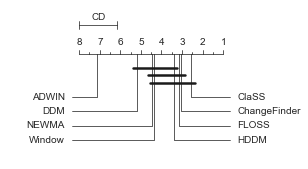

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4,
                                      filename=f"../../figures/cd_comparative_{dataset}.pdf")  #

Let's compute wins/losses against ClaSS.

In [11]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs ADWIN: (wins/ties/losses): 32/0/0
ClaSS vs HDDM: (wins/ties/losses): 17/1/14
ClaSS vs NEWMA: (wins/ties/losses): 29/0/3
ClaSS vs ChangeFinder: (wins/ties/losses): 16/0/16
ClaSS vs DDM: (wins/ties/losses): 30/0/2
ClaSS vs Window: (wins/ties/losses): 28/0/4
ClaSS vs FLOSS: (wins/ties/losses): 21/0/11


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4061/3898032719.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4061/3898032719.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


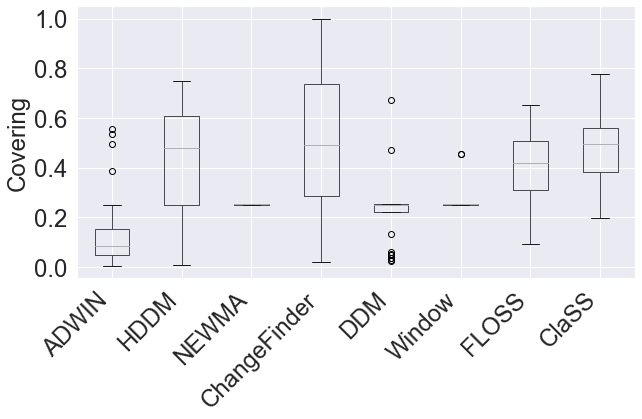

In [12]:
fontsize = 24
_, ax = plt.subplots(figsize=(10, 5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight")